# This notebook is a walkthrough for generating a SVM based sampling coordinate for accelerated sampling.  

In [1]:
# some basic python imports 
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.color_palette("colorblind")
sns.set_context("poster",1.3)
import mdtraj as md
from msmbuilder.utils import load,dump

/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/muneeb/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# The train trajectories are from DESRES so we can't provide them .However, they are really nice so getting those trajecotories is only an email away.  In the meanwhile, we do provide the SVM model, plumed files, and starting pdbs



In [2]:
loc = "./data/"

In [3]:
all_atom_trj = md.load("%s/0.pdb"%loc)

In [5]:
all_atom_f = load("./data/all_atom_featurizer.pkl")
all_atom_df = load("./data/all_atom_feature_descriptor.pkl")

## We use a combinition of dihedrals and contacts, and the all_atom_df pandas dataframe can be used to find out exact features

In [8]:
all_atom_df.head(10)

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[4, 25, 46, 58]",N/A,AlphaAngle,cos,"[0, 1, 2, 3]","[ASP, PRO, TYR]","[1, 2, 3, 4]"
1,"[25, 46, 58, 72]",N/A,AlphaAngle,cos,"[1, 2, 3, 4]","[ASP, PRO, GLU, TYR]","[2, 3, 4, 5]"
2,"[46, 58, 72, 87]",N/A,AlphaAngle,cos,"[2, 3, 4, 5]","[ASP, PRO, GLU, THR]","[3, 4, 5, 6]"
3,"[58, 72, 87, 101]",N/A,AlphaAngle,cos,"[3, 4, 5, 6]","[THR, PRO, GLU, GLY]","[4, 5, 6, 7]"
4,"[72, 87, 101, 108]",N/A,AlphaAngle,cos,"[4, 5, 6, 7]","[THR, GLU, GLY]","[8, 5, 6, 7]"
5,"[87, 101, 108, 122]",N/A,AlphaAngle,cos,"[8, 5, 6, 7]","[TRP, THR, GLY]","[8, 9, 6, 7]"
6,"[101, 108, 122, 146]",N/A,AlphaAngle,cos,"[8, 9, 6, 7]","[TRP, THR, TYR, GLY]","[8, 9, 10, 7]"
7,"[4, 25, 46, 58]",N/A,AlphaAngle,sin,"[0, 1, 2, 3]","[ASP, PRO, TYR]","[1, 2, 3, 4]"
8,"[25, 46, 58, 72]",N/A,AlphaAngle,sin,"[1, 2, 3, 4]","[ASP, PRO, GLU, TYR]","[2, 3, 4, 5]"
9,"[46, 58, 72, 87]",N/A,AlphaAngle,sin,"[2, 3, 4, 5]","[ASP, PRO, GLU, THR]","[3, 4, 5, 6]"


# The features are also scaled using data from the training simulation

In [10]:
nrm = load("./data/nrm.pkl")

# The generated SVM model is available in the data folder 

In [11]:
from sklearn.svm import SVC
import os


In [12]:
train=False 
if not os.path.isfile("./data//svm_model.pkl"):
    clf = SVC(kernel="linear")
    train =True 
else:
    clf = load("./data/svm_model.pkl")
    train =False

In [13]:
# Unfortunately, we can't provide the actual features but the trainging for these models is the same as alanine 
# except we now use a second transform 

# here basin_!.hdf5 is the trajectory from the unfolded state, and basin_2.hdf5 is the trajecotory from the folded state

# t1 = md.load("./basin_1.hdf5")
# t2 = md.load("./basin_2.hdf5")

# features = all_atom_f.fit_transform([t1,t2])
# nrm_features = nrm.fit_transform(np.concatenate(features))

# train_X=np.vstack(nrm_features)

# train_Y=np.concatenate([np.zeros(1000),
#             np.ones(1000)])
# if train:
#     clf.fit(train_X, train_Y)
# else:
#     pass

 # We can rank order the features via their coeffcients 

In [16]:
all_atom_df.iloc[np.argsort(np.abs(clf.coef_))[0]]

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
9,"[46, 58, 72, 87]",N/A,AlphaAngle,sin,"[2, 3, 4, 5]","[ASP, PRO, GLU, THR]","[3, 4, 5, 6]"
12,"[87, 101, 108, 122]",N/A,AlphaAngle,sin,"[8, 5, 6, 7]","[TRP, THR, GLY]","[8, 9, 6, 7]"
57,"[[25], [72]]",ca,Contact,20,"[1, 4]","[TYR, GLU]","[2, 5]"
19,"[97, 99, 101, 104]",phi,Dihedral,sin,"[5, 6]","[THR, GLY]","[6, 7]"
22,"[142, 144, 146, 163]",phi,Dihedral,sin,"[8, 9]","[TYR, TRP]","[9, 10]"
72,"[[72], [108]]",ca,Contact,20,"[4, 7]","[GLU, THR]","[5, 8]"
4,"[72, 87, 101, 108]",N/A,AlphaAngle,cos,"[4, 5, 6, 7]","[THR, GLU, GLY]","[8, 5, 6, 7]"
18,"[83, 85, 87, 97]",phi,Dihedral,sin,"[4, 5]","[THR, GLU]","[5, 6]"
69,"[[58], [108]]",ca,Contact,20,"[3, 7]","[PRO, THR]","[4, 8]"
32,"[0, 4, 21, 23]",psi,Dihedral,sin,"[0, 1]",[TYR],"[1, 2]"


# or plot them 

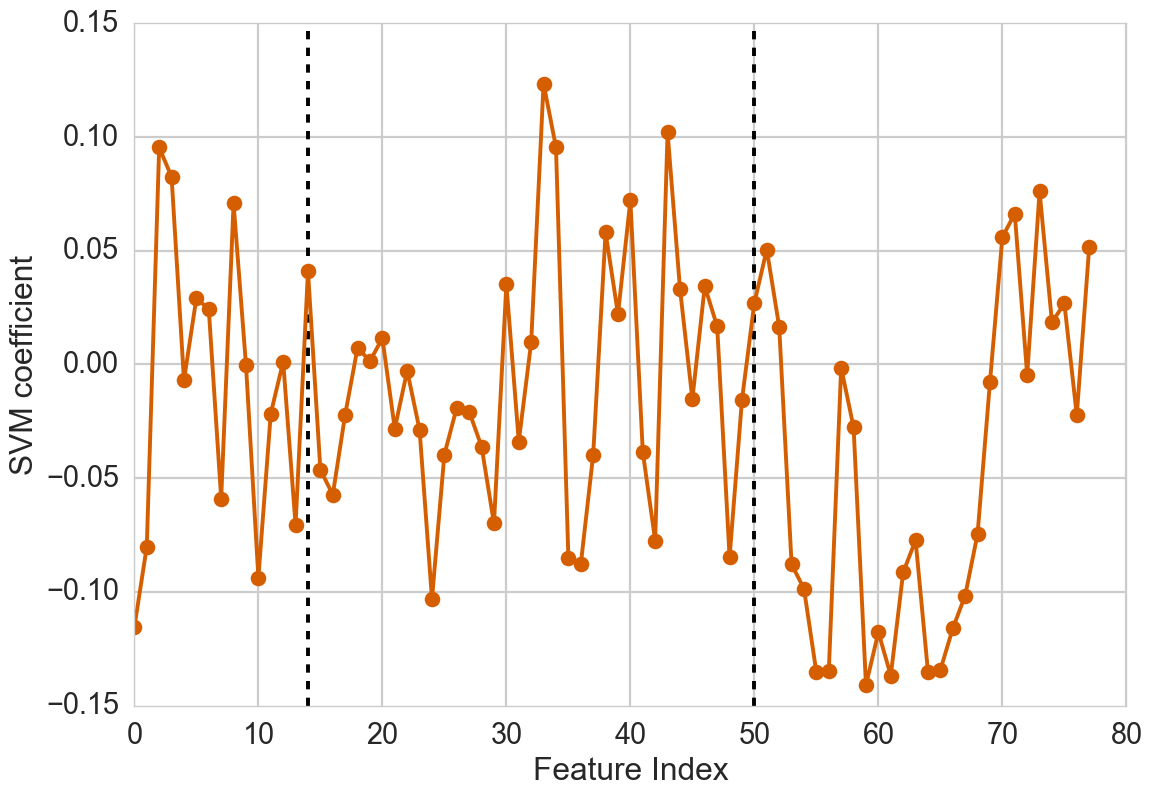

In [32]:
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
ylim([-.15,0.15])
xlabel("Feature Index")
ylabel(r'SVM coefficient')

In [18]:
# in these train_x is from above
# b=clf.decision_function(train_X)/np.linalg.norm(clf.coef_)
# np.std(b[1000:])

(-12, 6)

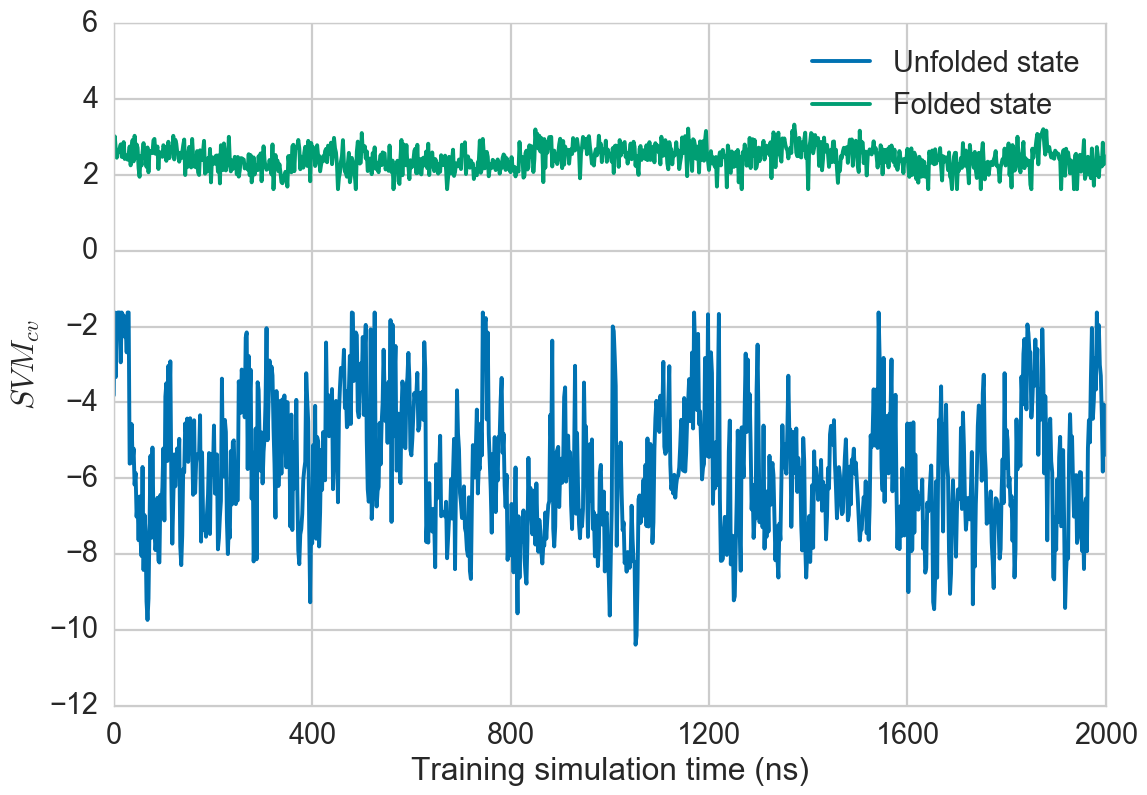

In [23]:
plot(b[:1000],label="Unfolded state",c=clr_plt[0])
plot(b[1000:],label="Folded state",c=clr_plt[1])
legend()
xlabel("Training simulation time (ns)")
ylabel(r'$SVM_{cv}$')
xticks([0,200,400,600,800,1000],[0,400,800,1200,1600,2000])
ylim([-12,6])

 # writing out the SVM's decision boundary to Plumed uses the same set of scripts as previously noted

In [19]:
from tica_metadynamics.pyplumed import render_df
from tica_metadynamics.pyplumed import render_meta 
from jinja2 import Template
from sklearn.utils.validation import check_is_fitted

In [20]:
plumed_matheval_template = Template("MATHEVAL ARG={{arg}} FUNC={{func}} LABEL={{label}} PERIODIC={{periodic}} ")

plumed_combine_template = Template("COMBINE LABEL={{label}} ARG={{arg}} COEFFICIENTS={{coefficients}} "+\
                                    "PERIODIC={{periodic}} ")
def render_svm(clf=None, input_prefix="f0", output_prefix="l"):
    if clf is None or check_is_fitted(clf,attributes=["coef_","intercept_"]):
        raise ValueError("Need a fitted Sklearn SVM object")
    else:
        n_args = clf.coef_.shape[1]
        output = []
        arg_list=",".join(["%s_%d"%(input_prefix,i) for i in range(n_args)])
        coeff = ",".join([str(i) for i in clf.coef_[0]])
        w_norm = np.linalg.norm(clf.coef_)
        
        output.append(plumed_combine_template.render(label="%s_0"%output_prefix,
                                      arg=arg_list,
                                      coefficients=coeff,
                                      periodic="NO")+"\n")
        
        func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))
        
        output.append(plumed_matheval_template.render(label="%s_1"%output_prefix,
                                      arg="l_0",
                                      func=func,
                                      periodic="NO")+"\n")        
        
    return ''.join(output)
        
        

In [21]:
total_out=[]
total_out.extend("RESTART\n")
total_out.extend(render_df(all_atom_df,nrm=nrm))
total_out.extend(render_svm(clf))
total_out.extend(render_meta.render_metad_code("l_1",biasfactor=6,sigma=0.25))
total_out.extend(render_meta.render_metad_bias_print("l_1,metad.bias"))

# Here is the full Plumed script

In [23]:
print("".join(total_out))

RESTART
TORSION ATOMS=5,26,47,59 LABEL=N/A_0_1_2_3 

TORSION ATOMS=26,47,59,73 LABEL=N/A_1_2_3_4 

TORSION ATOMS=47,59,73,88 LABEL=N/A_2_3_4_5 

TORSION ATOMS=59,73,88,102 LABEL=N/A_3_4_5_6 

TORSION ATOMS=73,88,102,109 LABEL=N/A_4_5_6_7 

TORSION ATOMS=88,102,109,123 LABEL=N/A_8_5_6_7 

TORSION ATOMS=102,109,123,147 LABEL=N/A_8_9_6_7 

TORSION ATOMS=22,24,26,43 LABEL=phi_0_1 

TORSION ATOMS=43,45,47,55 LABEL=phi_1_2 

TORSION ATOMS=55,57,59,69 LABEL=phi_2_3 

TORSION ATOMS=69,71,73,84 LABEL=phi_3_4 

TORSION ATOMS=84,86,88,98 LABEL=phi_4_5 

TORSION ATOMS=98,100,102,105 LABEL=phi_5_6 

TORSION ATOMS=105,107,109,119 LABEL=phi_6_7 

TORSION ATOMS=119,121,123,143 LABEL=phi_8_7 

TORSION ATOMS=143,145,147,164 LABEL=phi_8_9 

TORSION ATOMS=1,5,22,24 LABEL=psi_0_1 

TORSION ATOMS=24,26,43,45 LABEL=psi_1_2 

TORSION ATOMS=45,47,55,57 LABEL=psi_2_3 

TORSION ATOMS=57,59,69,71 LABEL=psi_3_4 

TORSION ATOMS=71,73,84,86 LABEL=psi_4_5 

TORSION ATOMS=86,88,98,100 LABEL=psi_5_6 

TORSION ATOMS=100

In [24]:
# We can now analyze the multiple walker simulations in differnt ways

In [72]:
# for example, we can concatenate all trajectories and load the bias for each frame in  that single long traj

In [67]:


loc = "./data/reweight/"
test_traj = md.load("%s/all_traj.xtc"%loc,top="%s/top.pdb"%loc)
bias = np.loadtxt("%s/BIAS"%loc)
#bias = np.loadtxt("./reweight2/reweight//BIAS")
#bias = np.loadtxt("./reweight//BIAS")

# first lets compute the SVM_cv which is the distance to the SVM's decision boundary

In [68]:
test_X = nrm.transform(all_atom_f.transform([test_traj])[0])
sklearn_out = clf.decision_function(test_X)/np.linalg.norm(clf.coef_)



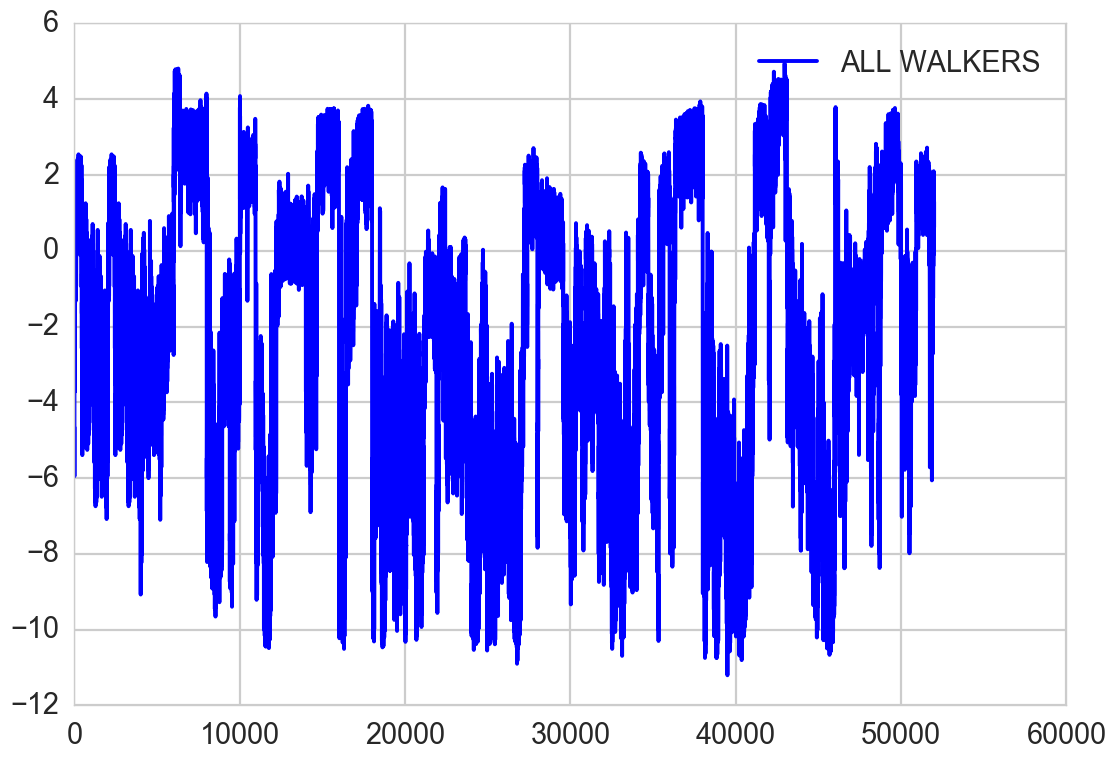

In [73]:
plot(sklearn_out, label="ALL WALKERS")
legend()

# Make sure that Plumed and Scikit learn agree on the values being computed 

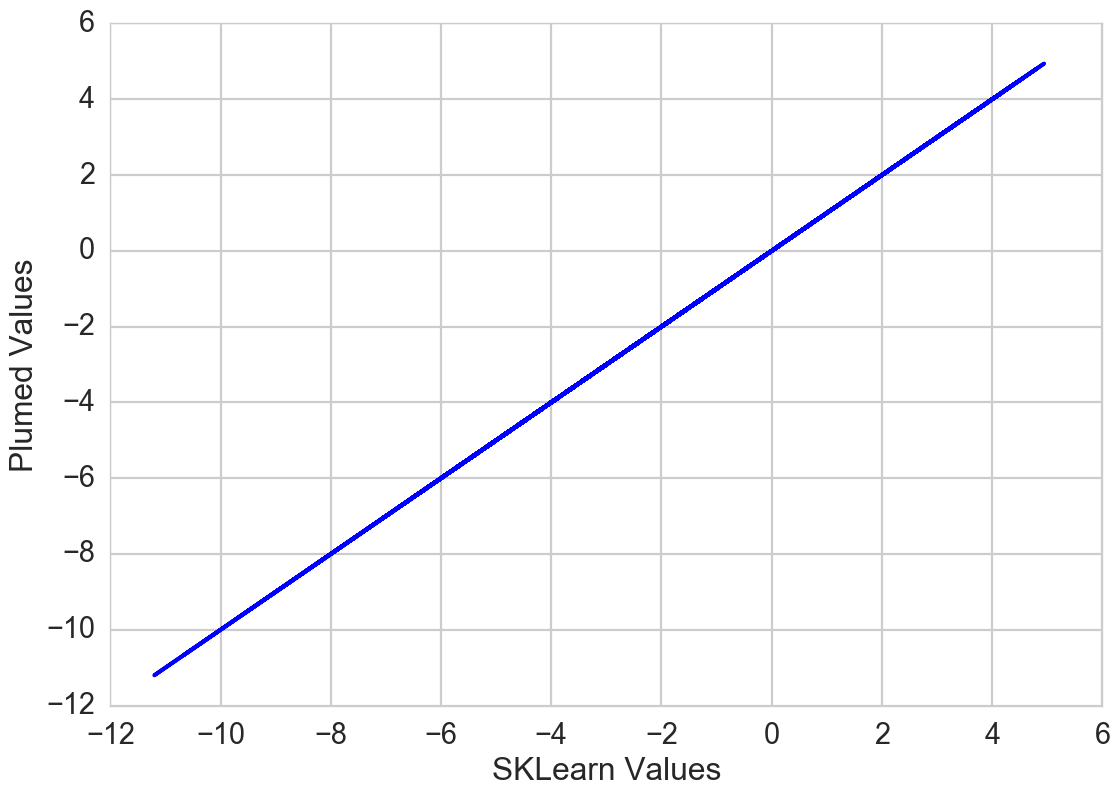

In [70]:
plot(sklearn_out,bias[:,1])
xlabel("SKLearn Values")
ylabel("Plumed Values")

# We can reweight using Tiwary's time independent estimator

##  The last column in the bias matrix contains the bias 

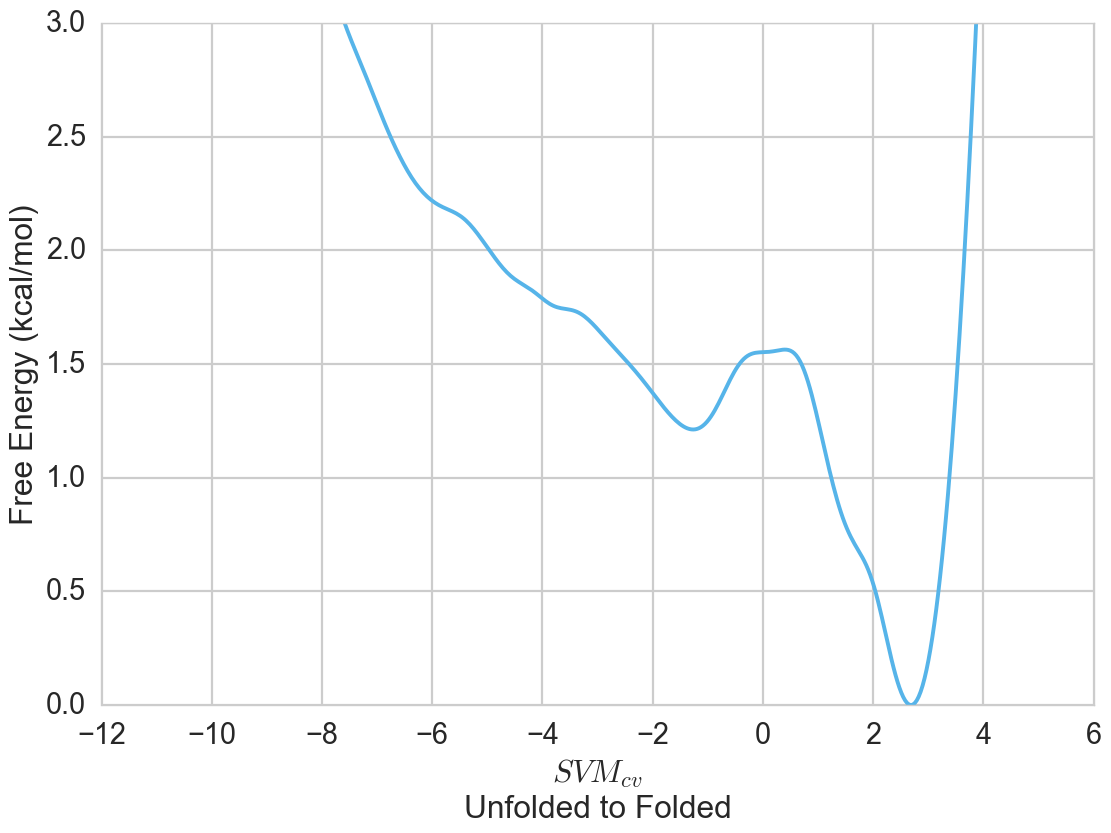

In [33]:
clr_plt = sns.color_palette("colorblind")
ax,data=msme.plot_free_energy(bias,obs=[1],n_samples=50000,pi=np.exp(bias[:,-1]/2.83),
                      cmap='viridis',gridsize=400,return_data=True,shade=False,color=clr_plt[5])
ax.set_ylim([0,3])
xlabel(r'$SVM_{cv}$'+"\nUnfolded to Folded")
ylabel("Free Energy (kcal/mol)")


In [34]:
# Or simply sum up the hills

In [35]:
fes = np.loadtxt("./%s/fes.dat"%loc)

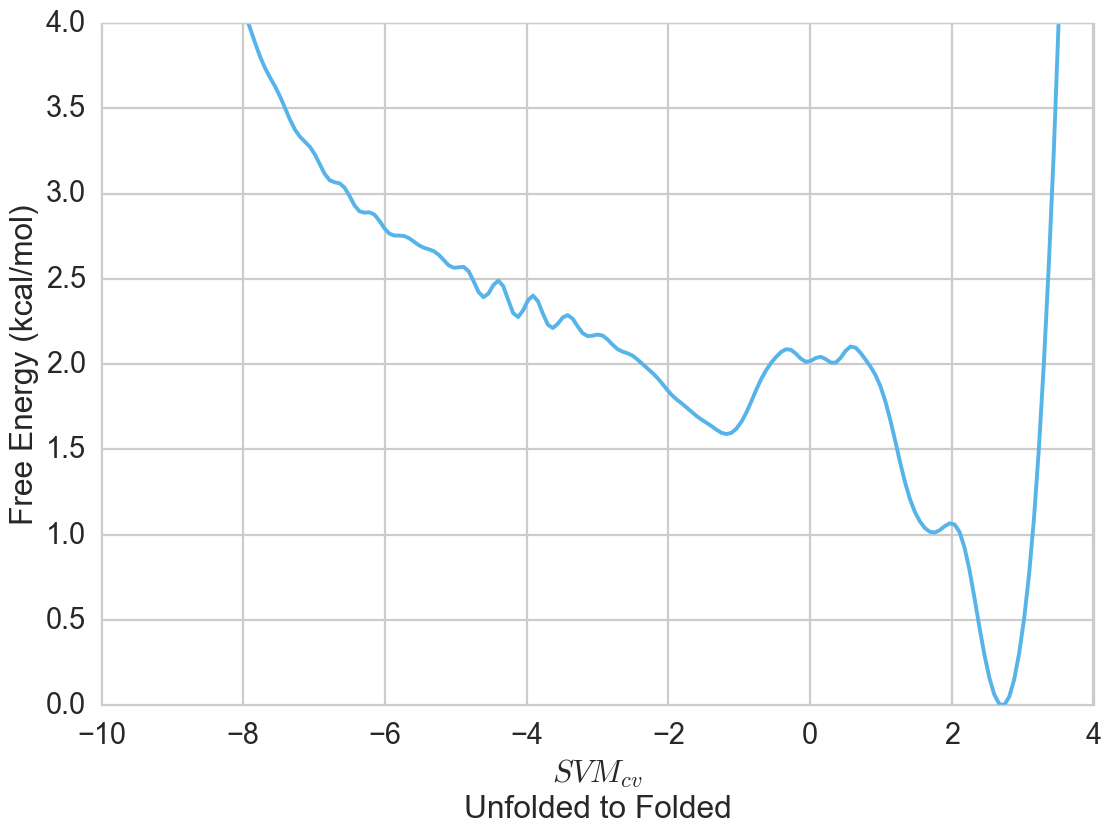

In [36]:
plot(fes[:,0],(fes[:,1]-fes[:,1].min())/4.18,c=clr_plt[5])
ylim([0,4])
xlabel(r'$SVM_{cv}$'+"\nUnfolded to Folded")
ylabel("Free Energy (kcal/mol)")

# We can also compute the CA RMSD to the NMR structure 

In [43]:
folded_pdb = md.load_pdb("https://files.rcsb.org/view/2RVD.pdb")

/Users/muneeb/anaconda/lib/python3.5/site-packages/mdtraj-1.9.0.dev0-py3.5-macosx-10.6-x86_64.egg/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [49]:
folded_pdb_decision_func = clf.decision_function(np.concatenate([nrm.transform(i) for i in all_atom_f.transform(folded_pdb)]))\
                      /np.linalg.norm(clf.coef_)

In [74]:
folded_pdb_decision_func

array([ 2.95594875,  3.14741796,  2.92654737,  3.54326466,  3.23576619,
        2.98847692,  3.11712674,  2.96063505,  3.64723095,  2.76920234,
        2.44936637,  3.09626651,  1.94650946,  2.58996735,  2.58660512,
        3.19879163,  3.04783435,  2.60073612,  3.07188875,  2.42934426])

In [76]:
ca_traj = test_traj.atom_slice([i.index for i in test_traj.top.atoms if i.name=='CA'])
ca_folded_pdb= folded_pdb.atom_slice([i.index for i in folded_pdb.top.atoms if i.name=='CA'])

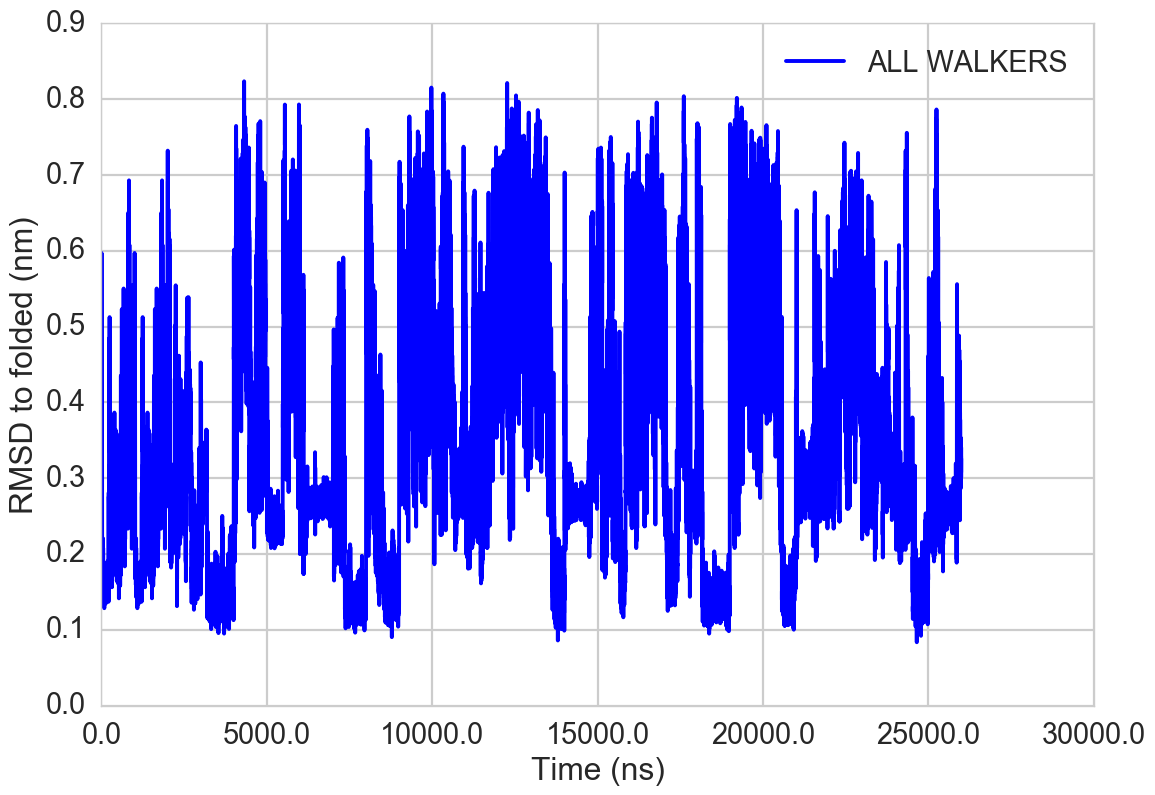

In [79]:
rmsd_data = md.rmsd(ca_traj,ca_folded_pdb)
plot(rmsd_data,label="ALL WALKERS")
legend()
xlabel("Time (ns)")
xticks([0,10000,20000,30000,40000,50000,60000],np.array([0,10000,20000,30000,40000,50000,60000])/2)
ylabel("RMSD to folded (nm)")

# Lets find which one of our walkers gets closest to the folded state

In [54]:
rmsd_dict={}
for walker_index in range(25):
    test_traj = md.load("%s/walker_%d.xtc"%(loc,walker_index),top="%s/top.pdb"%loc)
    ca_traj = test_traj.atom_slice([i.index for i in test_traj.top.atoms if i.name=='CA'])
    ca_folded_pdb= folded_pdb.atom_slice([i.index for i in folded_pdb.top.atoms if i.name=='CA'])
    rmsd_data = md.rmsd(ca_traj,ca_folded_pdb)
    rmsd_dict[walker_index] = rmsd_data

In [55]:
# quick hack to find interesting trajectories 

In [56]:
np.argsort([np.median(rmsd_dict[i]) for i in range(25)])

array([24, 10, 14, 15,  8, 13,  0,  1, 23, 20,  9, 21,  5, 12,  7, 18, 17,
        4,  2,  6, 11, 16, 22,  3, 19])

# Multiple trajectories get to within 1.5A of the folded state! 

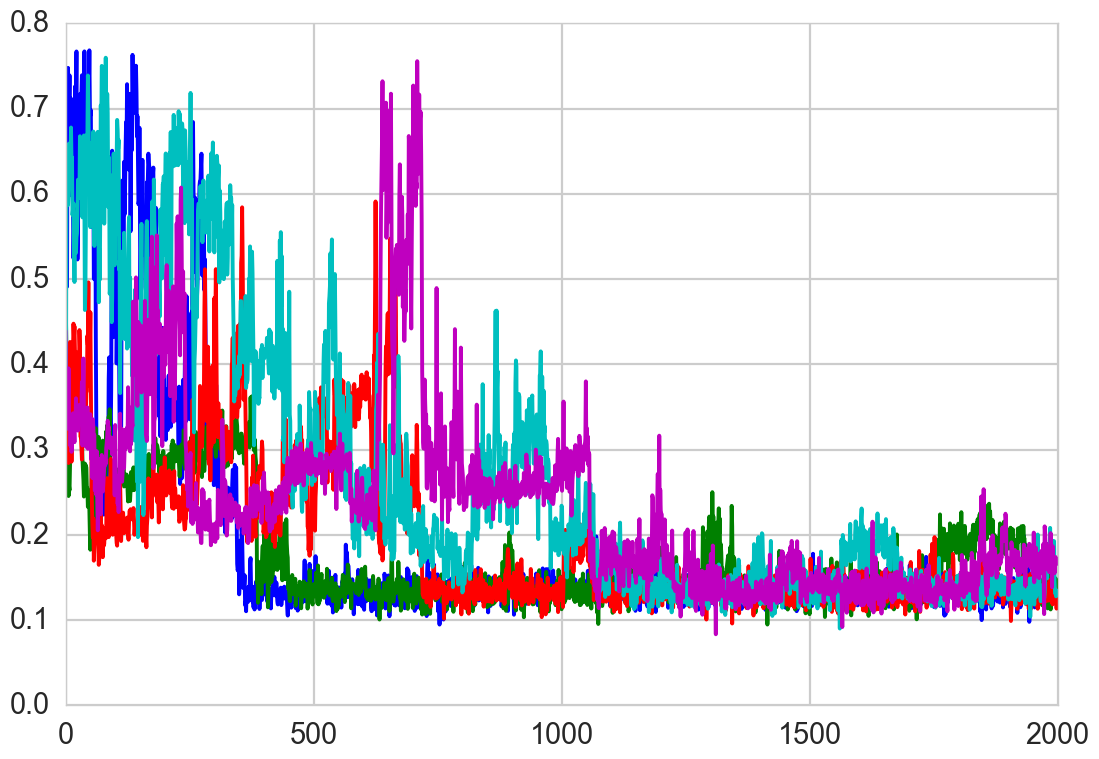

In [57]:
for i in [24,10,14,15,8]:
    plot(rmsd_dict[i])

# you can view walker_24.xtc (Or any of the other ones above) to see that it does indeed fold to the chignolin native state

In [63]:
walker_index = 24
test_traj = md.load("%s/walker_%d.xtc"%(loc,walker_index),top="%s/top.pdb"%loc)
test_X = nrm.transform(all_atom_f.transform([test_traj])[0])
sklearn_out = clf.decision_function(test_X)/np.linalg.norm(clf.coef_)

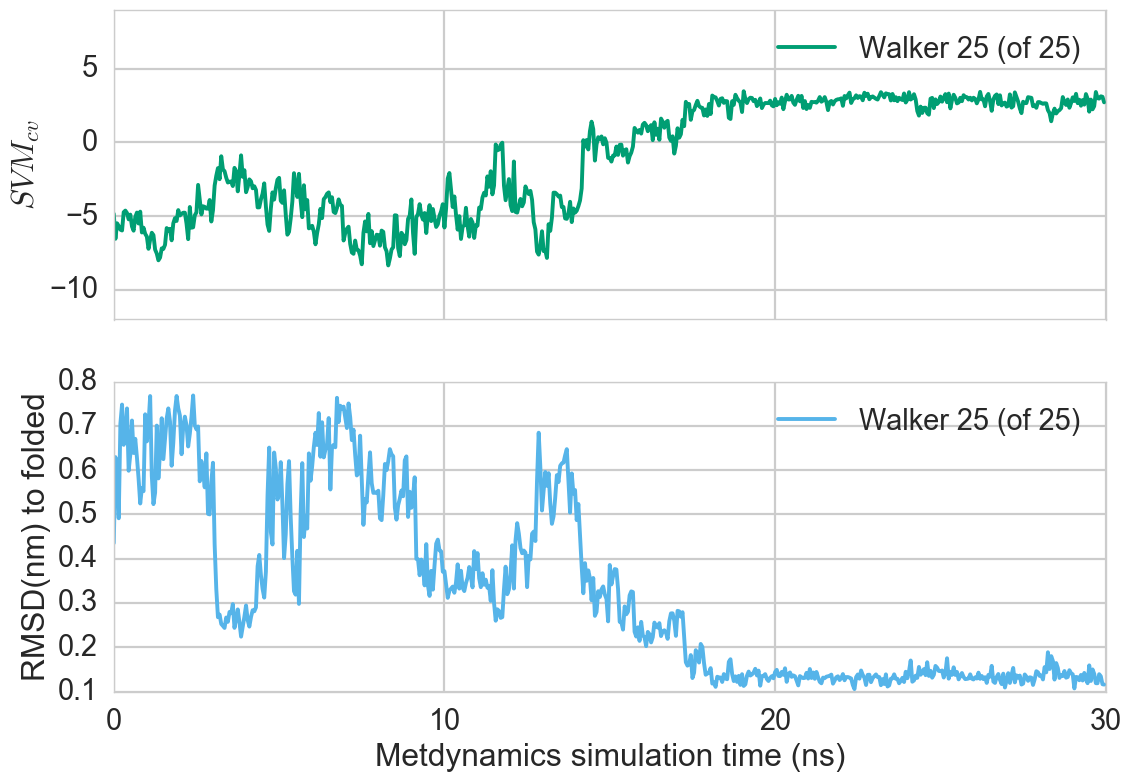

In [64]:
subplot(2,1,1)
plot(sklearn_out[:600],c=clr_plt[1],label="Walker 25 (of 25)")
ylabel(r'$SVM_{cv}$')
legend()
xticks([0,200,400,600],[])
ylim([-12,9])
subplot(2,1,2)
plot(rmsd_dict[24][:600],c=clr_plt[5],label="Walker 25 (of 25)")
legend()
xticks([0,200,400,600],[0,10,20,30])
xlabel("Metdynamics simulation time (ns)")
ylabel("RMSD(nm) to folded")
# vlines(585,0.1,0.8,linestyles='dotted')